In [207]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [208]:
# Target User Accounts
target_user = ("@BBCWorld", "@CBSNews", "@CNN", '@FoxNews', '@nytimes')


#Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
user_list = []
tweets_ago = []


# Loop through each user
for user in target_user:
    
    counter = 0

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets 
        for tweet in public_tweets:
        
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
        
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            user_list.append(user)
            tweets_ago.append(counter)
            
            counter +=1
    
# Create a dictionary of results
user_results = {
    "Username": user_list,
    "Compound Score": (compound_list),
    "Postive Score": (positive_list),
    "Neutral Score": (neutral_list),
    "Negative Score": (negative_list),
    "Tweets Ago": tweets_ago,
    }



In [209]:
results_df = pd.DataFrame(user_results).set_index('Username').round(3)
results_df

,Compound Score,Negative Score,Neutral Score,Postive Score,Tweets Ago
Username,,,,,
@BBCWorld,-0.477,0.256,0.744,0.000,0
@BBCWorld,0.000,0.000,1.000,0.000,1
@BBCWorld,-0.477,0.279,0.721,0.000,2
@BBCWorld,-0.440,0.293,0.707,0.000,3
@BBCWorld,0.000,0.000,1.000,0.000,4
@BBCWorld,0.000,0.323,0.354,0.323,5
@BBCWorld,-0.361,0.200,0.800,0.000,6
@BBCWorld,0.000,0.000,1.000,0.000,7
@BBCWorld,0.000,0.000,1.000,0.000,8


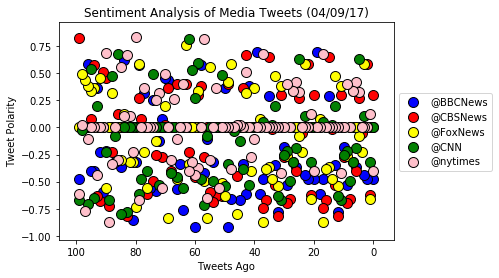

In [235]:
BBC_x = results_df['Tweets Ago'].loc['@BBCWorld']
BBC_y = results_df['Compound Score'].loc['@BBCWorld']
CBS_x = results_df['Tweets Ago'].loc['@CBSNews']
CBS_y = results_df['Compound Score'].loc['@CBSNews']
CNN_x = results_df['Tweets Ago'].loc['@CNN']
CNN_y = results_df['Compound Score'].loc['@CNN']
FOX_x = results_df['Tweets Ago'].loc['@FoxNews']
FOX_y = results_df['Compound Score'].loc['@FoxNews']
NYT_x = results_df['Tweets Ago'].loc['@nytimes']
NYT_y = results_df['Compound Score'].loc['@nytimes']


#x = [BBC_x, CBS_x, CNN_x, FOX_x, NYT_x]
#y = [BBC_y, CBS_y, CNN_y, FOX_y, NYT_y]
labels = ['@BBCWorld', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']
colors = ['red','green','blue', 'yellow','pink']

#plt.scatter((BBC_x,   marker="o", label='@BBCWorld', facecolors="red", edgecolors="black", alpha=0.75)
#plt.scatter()
#plt.scatter(x,y,color=['red','green','blue', 'yellow','pink'], edgecolor='black', s=100, alpha= .999, label=labels)
#for color, label in zip(colors, labels):
plt.scatter(BBC_x, BBC_y, c='blue', edgecolor='black', s=100, alpha= .99, label='@BBCNews')
plt.scatter(CBS_x, CBS_y, c='red', edgecolor='black', s=100, alpha= .99, label='@CBSNews')
plt.scatter(FOX_x, FOX_y, c='yellow', edgecolor='black', s=100, alpha= .99, label='@FoxNews')
plt.scatter(CNN_x, CNN_y, c='green', edgecolor='black', s=100, alpha= .99, label='@CNN')
plt.scatter(NYT_x, NYT_y, c='pink', edgecolor='black', s=100, alpha= .99, label='@nytimes')
plt.gca().invert_xaxis()
plt.legend(bbox_to_anchor=(1, .7), loc='best', ncol=1,)
plt.title("Sentiment Analysis of Media Tweets (04/09/17)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.show()


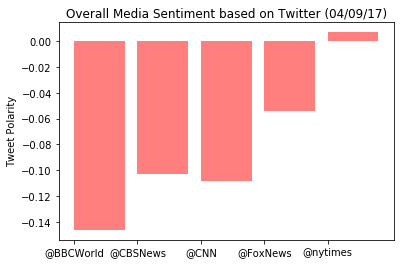

In [239]:
BBC = np.mean(results_df['Compound Score'].loc['@BBCWorld'])
CBS = np.mean(results_df['Compound Score'].loc['@CBSNews'])
CNN = np.mean(results_df['Compound Score'].loc['@CNN'])
FOX = np.mean(results_df['Compound Score'].loc['@FoxNews'])
NYT= np.mean(results_df['Compound Score'].loc['@nytimes'])

y1 = [BBC, CBS, CNN, FOX, NYT]

plt.bar(labels, y1, color='r', alpha=0.5, align="edge")
plt.title("Overall Media Sentiment based on Twitter (04/09/17)")
plt.ylabel("Tweet Polarity")
plt.show()